In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_excel("D:\BTP\Gopalkheda and yerli\calibration and validation__MLR\Gopalkheda_365.xlsx")
df

,Year,Month,Day,Discharge,RF1,RF2,RF3,RF4,RF5,RF6,...,RF123,RF124,RF125,RF126,RF127,Lumped rainfall gopalkheda,Lumped rainfall yerli,Q(t-1),Q(t-2),Q(t-3)
0,1977,6,1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0
1,1977,6,2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.0,0.0
2,1977,6,3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.3,0.0
3,1977,6,4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.3,0.3
4,1977,6,5,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2021,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1255,0.073053,0.0,0.0,0.0
16067,2021,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,2.9,0.0,0.0,0.8850,0.820913,0.0,0.0,0.0
16068,2021,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.1924,0.307082,0.0,0.0,0.0
16069,2021,5,30,0.0,5.9,0.0,0.1,0.3,5.2,11.1,...,0.0,0.0,0.0,0.0,0.0,1.7709,3.300925,0.0,0.0,0.0


In [3]:
df1 = df[0:12418]
df2 = df[12418:]
df1

,Year,Month,Day,Discharge,RF1,RF2,RF3,RF4,RF5,RF6,...,RF123,RF124,RF125,RF126,RF127,Lumped rainfall gopalkheda,Lumped rainfall yerli,Q(t-1),Q(t-2),Q(t-3)
0,1977,6,1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0
1,1977,6,2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.0,0.0
2,1977,6,3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.3,0.0
3,1977,6,4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.3,0.3
4,1977,6,5,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.3,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,2011,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0
12414,2011,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.5,0.0,0.0,0.0,0.4434,0.378076,0.0,0.0,0.0
12415,2011,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.6,0.0,0.0,0.0,0.0000,0.063752,0.0,0.0,0.0
12416,2011,5,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0


In [4]:
df2

,Year,Month,Day,Discharge,RF1,RF2,RF3,RF4,RF5,RF6,...,RF123,RF124,RF125,RF126,RF127,Lumped rainfall gopalkheda,Lumped rainfall yerli,Q(t-1),Q(t-2),Q(t-3)
12418,2011,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0
12419,2011,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0830,1.378468,0.0,0.0,0.0
12420,2011,6,3,0.0,5.7,5.1,6.8,1.0,2.3,7.0,...,0.6,0.0,1.4,5.1,0.8,1.6600,2.368115,0.0,0.0,0.0
12421,2011,6,4,0.0,24.0,0.0,4.5,10.0,15.0,34.3,...,0.0,0.4,2.1,0.0,0.0,1.2028,0.935607,0.0,0.0,0.0
12422,2011,6,5,0.0,5.9,3.2,2.1,0.2,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.2550,0.998581,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2021,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1255,0.073053,0.0,0.0,0.0
16067,2021,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,2.9,0.0,0.0,0.8850,0.820913,0.0,0.0,0.0
16068,2021,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.1924,0.307082,0.0,0.0,0.0
16069,2021,5,30,0.0,5.9,0.0,0.1,0.3,5.2,11.1,...,0.0,0.0,0.0,0.0,0.0,1.7709,3.300925,0.0,0.0,0.0


In [5]:
print(df1.shape,df2.shape)

(12418, 136) (3653, 136)


In [6]:
mean = df1['Discharge'].mean()
median = df1['Discharge'].median()
var = math.sqrt(df1['Discharge'].var())
cv = (var/mean)*100
count = (df1['Discharge'] == 0).sum()
# print(mean,median,var,cv,(count/8035)*100)
print("Train 80%")
print(f"mean: {mean}")
print(f"median: {median}")
print(f"standard deviation: {var}")
print(f"coefficient of variation: {cv}")
print(f"count of zeros: {count}")
print(f"percentage of zeros: {(count/12418)*100}")

Train 80%
mean: 31.53374134321148
median: 2.8
standard deviation: 155.4350098976215
coefficient of variation: 492.9164865211379
count of zeros: 2727
percentage of zeros: 21.960057980351102


In [7]:
mean = df2['Discharge'].mean()
median = df2['Discharge'].median()
var = math.sqrt(df2['Discharge'].var())
cv = (var/mean)*100
count = (df2['Discharge'] == 0).sum()
print("validate 20%")
print(f"mean: {mean}")
print(f"median: {median}")
print(f"standard deviation: {var}")
print(f"coefficient of variation: {cv}")
print(f"count of zeros: {count}")
print(f"percentage of zeros: {(count/3653)*100}")

validate 20%
mean: 32.80166525880922
median: 0.0
standard deviation: 163.429358624695
coefficient of variation: 498.2349442786426
count of zeros: 2281
percentage of zeros: 62.44182863399945


## MLR

In [8]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[0.62082671] 11.95675234805103 0.40740185863408673 125.79134685515623


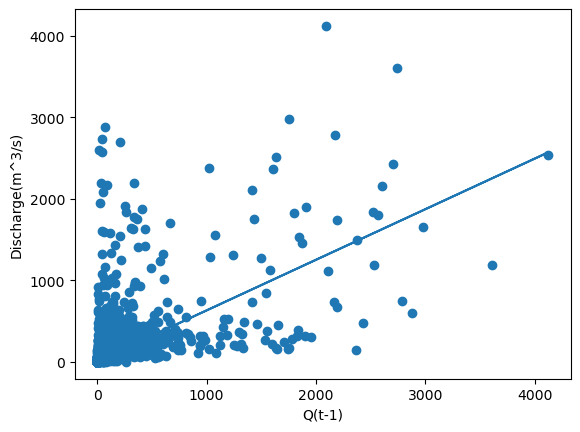

In [9]:
%matplotlib inline
plt.xlabel('Q(t-1)')
plt.ylabel('Discharge(m^3/s)')
plt.scatter(df1["Q(t-1)"],df1["Discharge"])
plt.plot(df1["Q(t-1)"],r1.predict(df1[["Q(t-1)"]]))

In [10]:
r2 = linear_model.LinearRegression()
r2.fit(df1[["Q(t-2)"]],df1.Discharge)
predicted = r2.predict(df2[["Q(t-2)"]])
print(r2.coef_, r2.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[0.331521] 21.079643903781623 0.10210493658224673 154.8400905330332


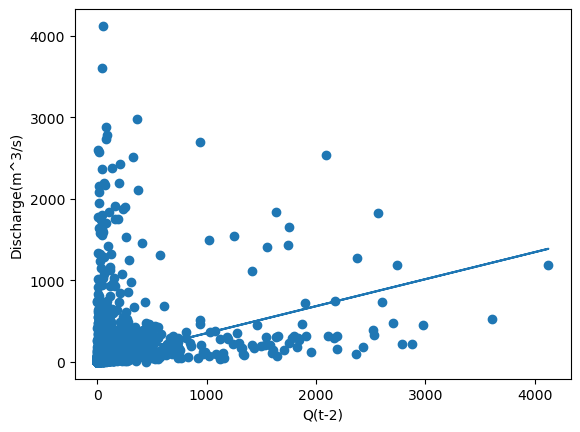

In [11]:
%matplotlib inline
plt.xlabel('Q(t-2)')
plt.ylabel('Discharge(m^3/s)')
plt.scatter(df1["Q(t-2)"],df1["Discharge"])
plt.plot(df1["Q(t-2)"],r2.predict(df1[["Q(t-2)"]]))

In [12]:
r3 = linear_model.LinearRegression()
r3.fit(df1[["Q(t-3)"]],df1.Discharge)
predicted = r3.predict(df2[["Q(t-3)"]])
print(r3.coef_, r3.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[0.25280136] 23.561968517886513 0.030386036715644438 160.90519099881237


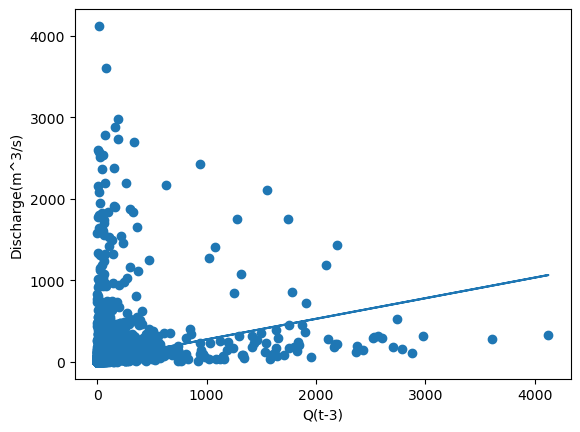

In [13]:
%matplotlib inline
plt.xlabel('Q(t-3)')
plt.ylabel('Discharge(m^3/s)')
plt.scatter(df1["Q(t-3)"],df1["Discharge"])
plt.plot(df1["Q(t-3)"],r3.predict(df1[["Q(t-3)"]]))

In [18]:
r4 = linear_model.LinearRegression()
r4.fit(df1[["Q(t-1)","Q(t-2)"]],df1.Discharge)
# print(r4.coef_, r4.intercept_)
predicted4 = r4.predict(df2[["Q(t-1)","Q(t-2)"]])
print(r4.coef_, r4.intercept_, r2_score(df2.Discharge, predicted4), mean_squared_error(df2.Discharge, predicted4,squared = False))

[ 0.67527994 -0.08771082] 13.005488946609951 0.4182108971279762 124.63884501750083


In [15]:
r5 = linear_model.LinearRegression()
r5.fit(df1[["Q(t-1)","Q(t-3)"]],df1.Discharge)
# print(r5.coef_, r5.intercept_)
predicted = r5.predict(df2[["Q(t-1)","Q(t-3)"]])
print(r5.coef_, r5.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[0.60332713 0.05278575] 10.844047499477142 0.40301804203212044 126.25576790515193


In [16]:
r6 = linear_model.LinearRegression()
r6.fit(df1[["Q(t-2)","Q(t-3)"]],df1.Discharge)
# print(r6.coef_, r6.intercept_)
predicted = r6.predict(df2[["Q(t-2)","Q(t-3)"]])
print(r6.coef_, r6.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[0.28405872 0.07645012] 20.165548732664334 0.09591573542366238 155.37283133868746


In [17]:
r7 = linear_model.LinearRegression()
r7.fit(df1[["Q(t-1)","Q(t-2)","Q(t-3)"]],df1.Discharge)
# print(r7.coef_, r7.intercept_)
predicted = r7.predict(df2[["Q(t-1)","Q(t-2)","Q(t-3)"]])
print(r7.coef_, r7.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[ 0.68727276 -0.18004278  0.13673138] 11.227230477325659 0.41945166377818854 124.50586705108672
